# International Airline Passengers

In [1]:
# Import libraries
import warnings
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Defaults
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams.update({'font.size': 12})
plt.style.use('ggplot')

In [2]:
# Load the data
data = pd.read_csv('C:/Users/Sai Kishore/Desktop/international-airline-passengers.csv', engine='python', skipfooter=3)

In [3]:
data.head()

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
# A bit of pre-processing to make it nicer
data['Month']=pd.to_datetime(data['Month'], format='%Y-%m-%d')
#setting the month as index
data.set_index(['Month'], inplace=True)

In [8]:
data.head()

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [6]:
data.isnull().sum()

International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60    0
dtype: int64

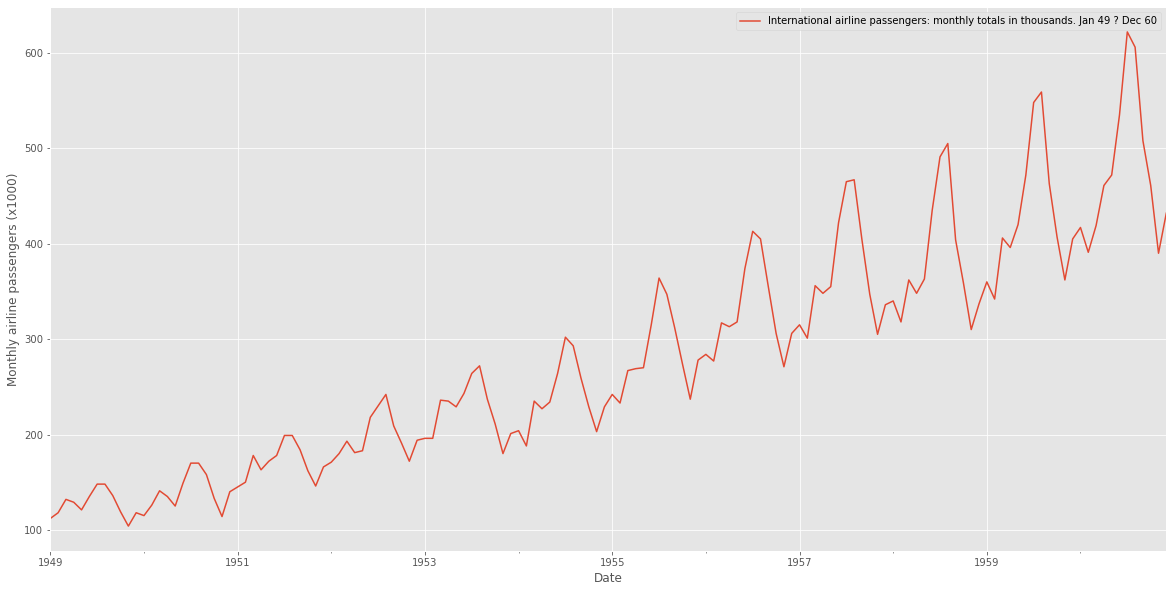

In [7]:
# Plot the data
data.plot()
plt.ylabel('Monthly airline passengers (x1000)')
plt.xlabel('Date')
plt.show()

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(data, model='additive')
print(result.trend)
print(result.seasonal)
print(result.resid)
print(result.observed)

print(result.observed)

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: trend, Length: 144, dtype: float64
Month
1949-01-01   -24.748737
1949-02-01   -36.188131
1949-03-01    -2.241162
1949-04-01    -8.036616
1949-05-01    -4.506313
                ...    
1960-08-01    62.823232
1960-09-01    16.520202
1960-10-01   -20.642677
1960-11-01   -53.593434
1960-12-01   -28.619949
Name: seasonal, Length: 144, dtype: float64
Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: resid, Length: 144, dtype: float64
Month
1949-01-01    112.0
1949-02-01    118.0
1949-03-01    132.0
1949-04-01    129.0
1949-05-01    121.0
              ...  
1960-08-01    606.0
1960-09-01    508.0
1960-10-01    461.0
1960-11-01    390.0
1960-12-01  

In [10]:
df_reconstructed = pd.concat([result.seasonal, result.trend, result.resid, result.observed], axis=1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
df_reconstructed.tail(20)

,seas,trend,resid,actual_values
Month,,,,
1959-05-01,-4.506313,420.500000,4.006313,420.0
1959-06-01,35.402778,425.500000,11.097222,472.0
1959-07-01,63.830808,430.708333,53.460859,548.0
1959-08-01,62.823232,435.125000,61.051768,559.0
1959-09-01,16.520202,437.708333,8.771465,463.0
1959-10-01,-20.642677,440.958333,-13.315657,407.0
1959-11-01,-53.593434,445.833333,-30.239899,362.0
1959-12-01,-28.619949,450.625000,-17.005051,405.0
1960-01-01,-24.748737,456.333333,-14.584596,417.0


UsageError: Line magic function `%%pypylot.show()` not found.


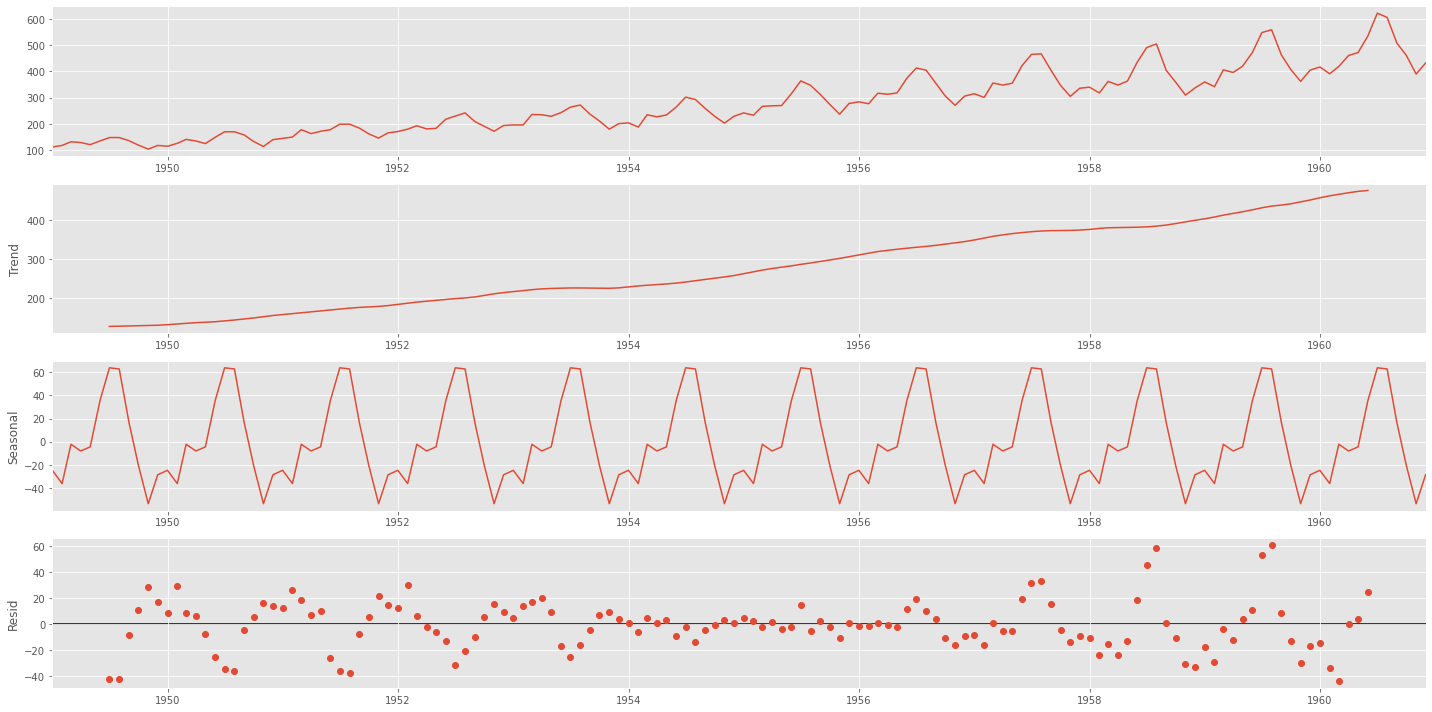

In [11]:
from matplotlib import pyplot
result = seasonal_decompose(data, model='additive')
result.plot()
%%pypylot.show()

In [13]:
df_reconstructed.dropna(axis=0,inplace=True)
df_reconstructed

,seas,trend,resid,actual_values
Month,,,,
1949-07-01,63.830808,126.791667,-42.622475,148.0
1949-08-01,62.823232,127.250000,-42.073232,148.0
1949-09-01,16.520202,127.958333,-8.478535,136.0
1949-10-01,-20.642677,128.583333,11.059343,119.0
1949-11-01,-53.593434,129.000000,28.593434,104.0
...,...,...,...,...
1960-02-01,-36.188131,461.375000,-34.186869,391.0
1960-03-01,-2.241162,465.208333,-43.967172,419.0
1960-04-01,-8.036616,469.333333,-0.296717,461.0


<AxesSubplot:xlabel='Month'>

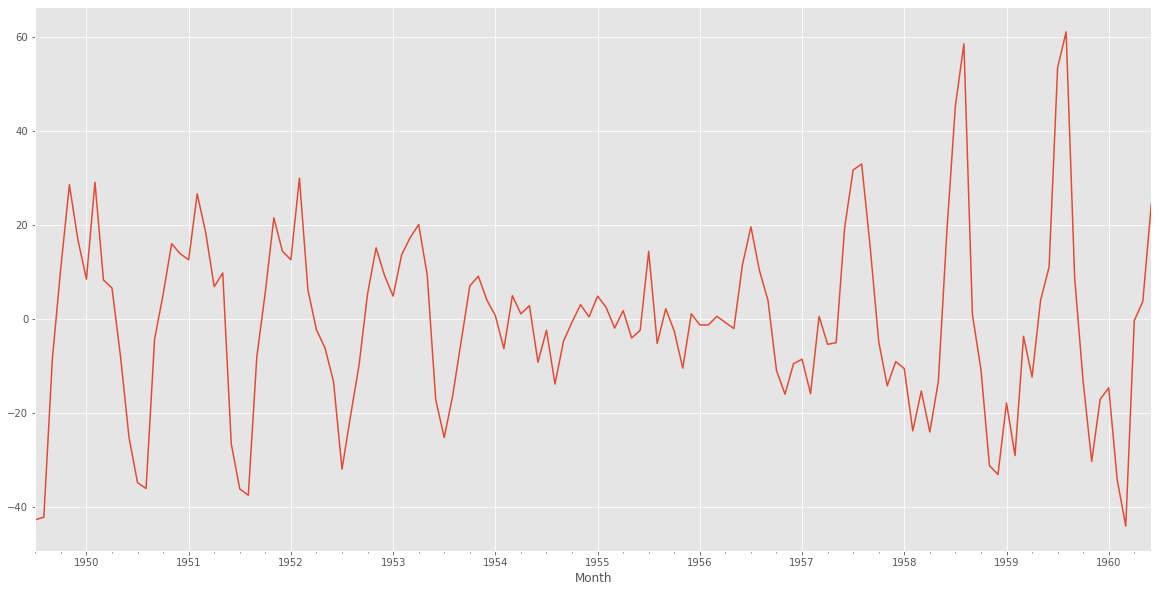

In [14]:
df_reconstructed.resid.plot()

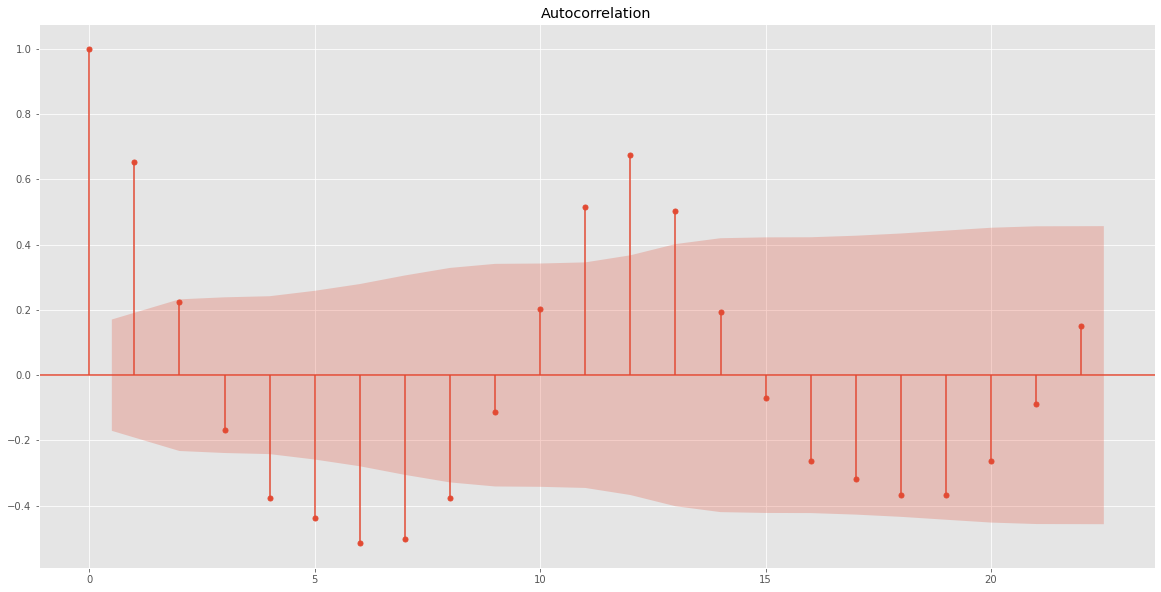

In [15]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(df_reconstructed.resid.values)
pyplot.show()

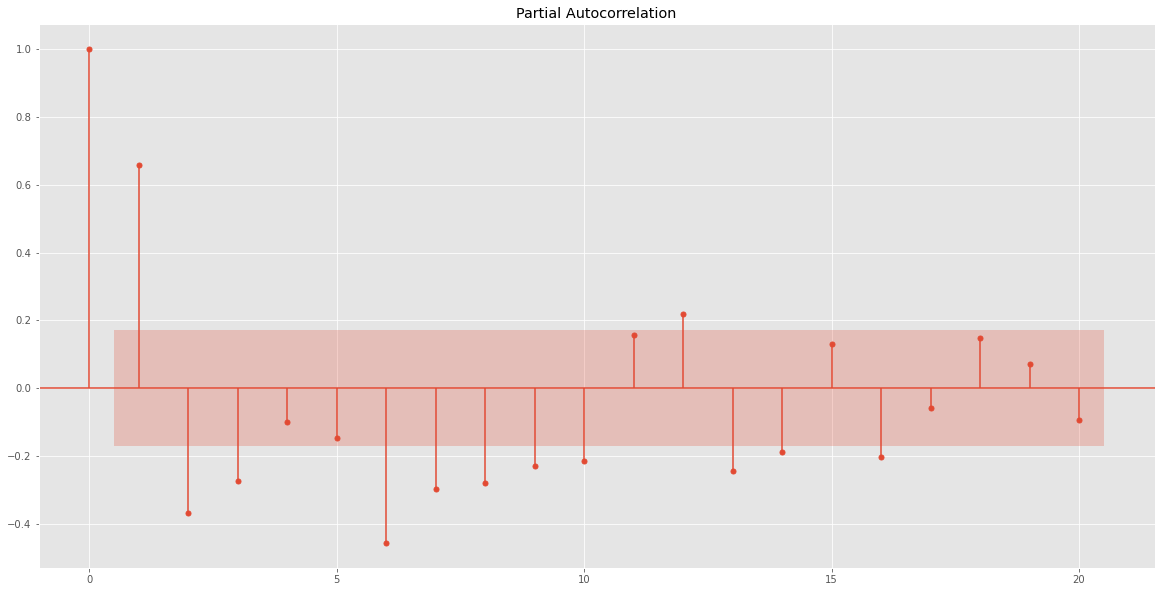

In [16]:
plot_pacf(df_reconstructed.resid, lags=20)
pyplot.show()

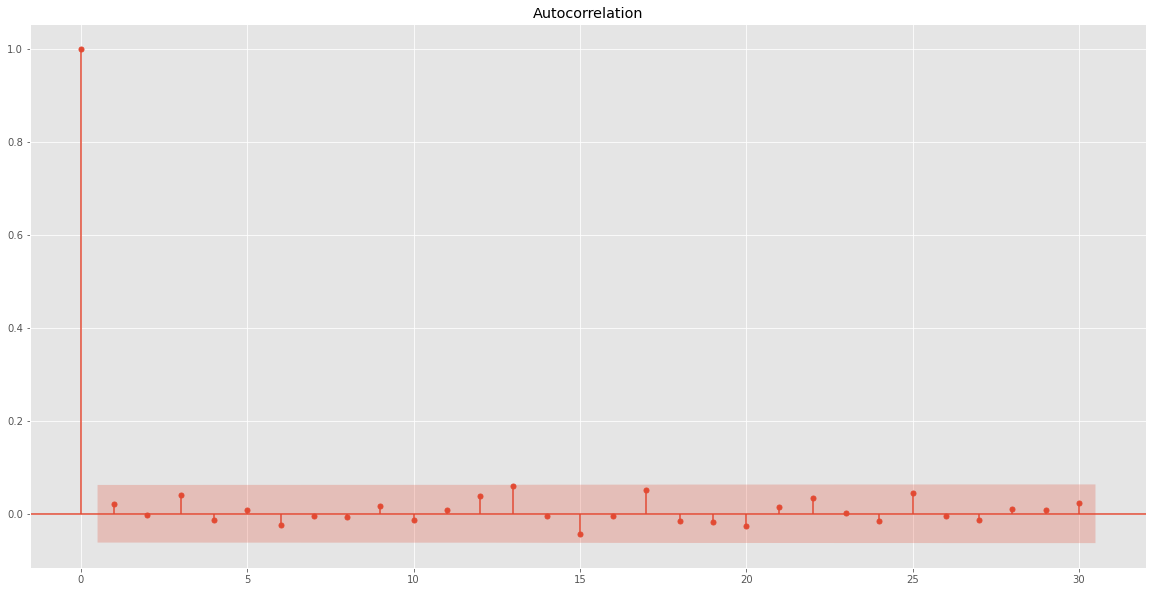

In [17]:
plot_acf(np.random.randn(1000))
pyplot.show()

In [18]:
from statsmodels.tsa.stattools import adfuller, kpss
# ADF Test
result = adfuller(np.random.randn(1000))
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# KPSS Test
result = kpss(np.random.randn(1000))
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -31.190253001490117
p-value: 0.0
Critial Values:
   1%, -3.4369127451400474
Critial Values:
   5%, -2.864437475834273
Critial Values:
   10%, -2.568312754566378

KPSS Statistic: 0.222208
p-value: 0.100000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


C:\Users\Sai Kishore\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\Sai Kishore\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


Two obvious patterns appear in the data, an overall increase in the number of passengers over time, and a 12 months seasonality with peaks corresponding to the northern hemisphere summer period.

In [19]:
train_data = data['1949-01-01':'1959-12-01']
test_data = data['1960-01-01':'1960-12-01']

In [20]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# fit model
model = ARIMA(train_data, order=(1, 1, 1))
model_fit = model.fit()

C:\Users\Sai Kishore\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Sai Kishore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred fre

In [21]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                                            ARIMA Model Results                                                             
============================================================================================================================================
Dep. Variable:     D.International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60   No. Observations:                  131
Model:                                                                               ARIMA(1, 1, 1)   Log Likelihood                -625.221
Method:                                                                                     css-mle   S.D. of innovations             28.510
Date:                                                                              Wed, 12 May 2021   AIC                           1258.441
Time:                                                                                      13:17:35   BIC                           1269.942
Sample:                                                                                  02-01-1949   HQIC                          1263.115
                                                                                       - 12-01-1959                                         
==========================================================================================================================================================
                                                                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                      2.3978      3.104      0.773      0.440      -3.685       8.481
ar.L1.D.International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60    -0.5459      0.098     -5.594      0.000      -0.737      -0.355
ma.L1.D.International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60     0.9279      0.048     19.246      0.000       0.833       1.022
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.8319           +0.0000j            1.8319            0.5000
MA.1           -1.0777           +0.0000j            1.0777            0.5000
-----------------------------------------------------------------------------
"""

ARIMA

ARIMA stands for Auto-Regressive Integrated Moving Average. There are three integers (p, d, q) that are used to parametrize ARIMA models. Because of that, a nonseasonal ARIMA model is denoted with ARIMA(p, d, q):

.p is the number of autoregressive terms (AR part). It allows to incorporate the effect of past values into our model. Intuitively, this would be similar to stating that it is likely to be warm tomorrow if it has been warm the past 3 days.
.d is the number of nonseasonal differences needed for stationarity. Intuitively, this would be similar to stating that it is likely to be same temperature tomorrow if the difference in temperature in the last three days has been very small.
.q is the number of lagged forecast errors in the prediction equation (MA part). This allows us to set the error of our model as a linear combination of the error values observed at previous time points in the past.

When dealing with seasonal effects, as in our example, seasonal ARIMA is used, which is denoted as ARIMA(p,d,q)(P,D,Q)s. Here, (p, d, q) are the nonseasonal parameters described above, (P, D, Q) follow the same definition but are applied to the seasonal component of the time series. The term s is the periodicity of the time series.

𝑠𝑡𝑎𝑡𝑠𝑚𝑜𝑑𝑒𝑙𝑠.𝑡𝑠𝑎.𝑠𝑡𝑎𝑡𝑒𝑠𝑝𝑎𝑐𝑒.𝑠𝑎𝑟𝑖𝑚𝑎𝑥.𝑆𝐴𝑅𝐼𝑀𝐴𝑋𝑅𝑒𝑠𝑢𝑙𝑡𝑠  returns values for AIC (Akaike Information Criterion) and BIC (Bayes Information Criterion) that can be minimized to select the best fitting model. We use the AIC value, which estimates the information lost when a given model is used to represent the process that generates the data. In doing so, it deals with the trade-off between the goodness of fit of the model and the complexity of the model itself.

ARIMA (p, d, q)
SARIMA (p, d ,q , S)

ARIMAX
SARIMAX

In [22]:
# Define the d and q parameters to take any value between 0 and 1
q = d = range(0, 2)
# Define the p parameters to take any value between 0 and 3
p = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


We select a subset of the data series as training data, say the first 11 years. Our goal is to predict the last year of the series based on this input.

In [23]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

AIC = []
SARIMAX_model = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train_data,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('SARIMAX{}x{} - AIC:{}'.format(param, param_seasonal, results.aic), end='\r')
            AIC.append(results.aic)
            SARIMAX_model.append([param, param_seasonal])
        except:
            continue

In [24]:
print('The smallest AIC is {} for model SARIMAX{}x{}'.format(min(AIC), SARIMAX_model[AIC.index(min(AIC))][0],SARIMAX_model[AIC.index(min(AIC))][1]))

The smallest AIC is 802.8580194673821 for model SARIMAX(0, 1, 1)x(1, 1, 1, 12)


In [25]:
# Let's fit this model
mod = sm.tsa.statespace.SARIMAX(train_data,
                                order=SARIMAX_model[AIC.index(min(AIC))][0],
                                seasonal_order=SARIMAX_model[AIC.index(min(AIC))][1],
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

Once the model has been fitted, we can check if does what we expect and if the assumptions we made are violated. To do this, we can use the  𝑝𝑙𝑜𝑡_𝑑𝑖𝑎𝑔𝑛𝑜𝑠𝑡𝑖𝑐𝑠  method.

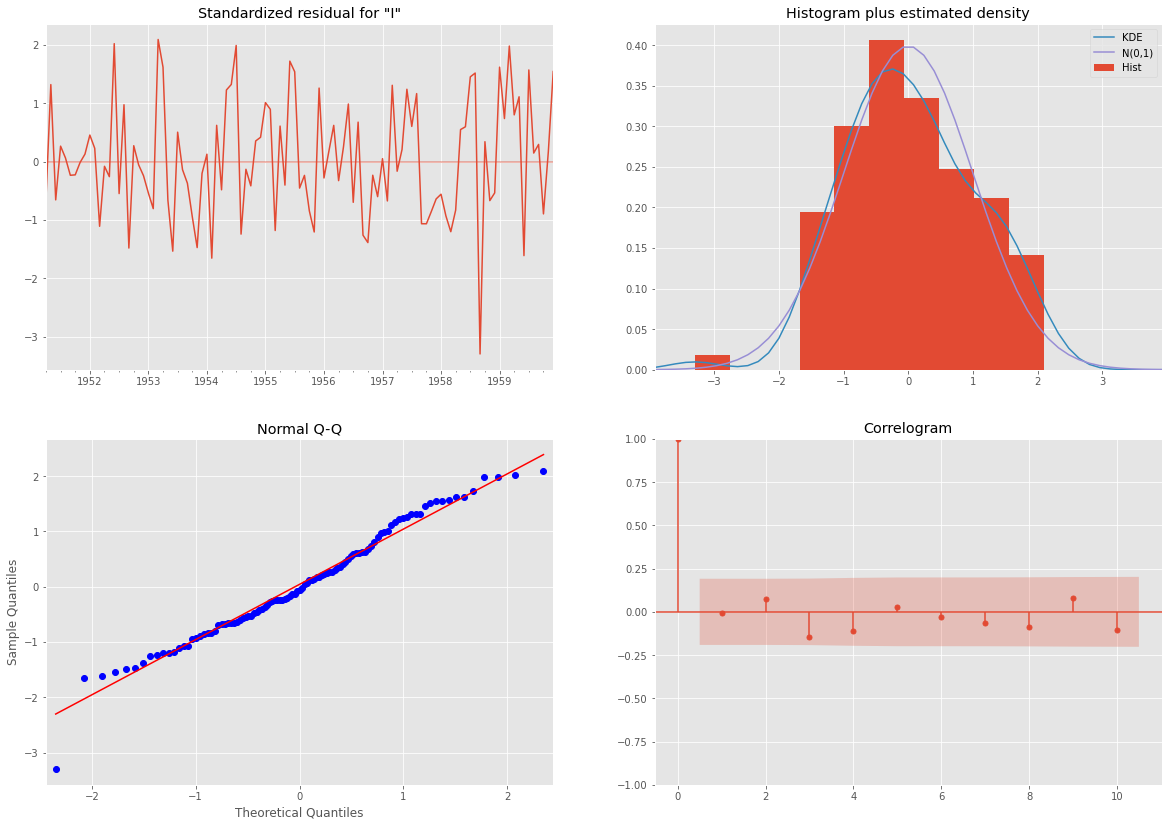

In [27]:
results.plot_diagnostics(figsize=(20, 14))
plt.show()

In the plots above, we can observe that the residuals are uncorrelated (bottom right plot) and do not exhibit any obvious seasonality (the top left plot). Also, the residuals and roughly normally distributed with zero mean (top right plot). The qq-plot on the bottom left shows that the ordered distribution of residuals (blue dots) roghly follows the linear trend of samples taken from a standard normal distribution with N(0, 1). Again, this is a strong indication that the residuals are normally distributed.

Results

Now let's create some predictions. We will use three methods:

1) In sample prediction with 1-step ahead forecasting of the last year (1959). In this case the model is used to predict data that the model was built on. 1-step ahead forecasting implies that each forecasted point is used to predict the following one.

In [28]:
pred0 = results.get_prediction(start='1958-01-01', dynamic=False)
pred0_ci = pred0.conf_int()

2) In sample prediction with dynamic forecasting of the last year (1959). Again, the model is used to predict data that the model was built on.

In [29]:
pred1 = results.get_prediction(start='1958-01-01', dynamic=True)
pred1_ci = pred1.conf_int()

3) "True" forecasting of out of sample data. In this case the model is asked to predict data it has not seen before

In [30]:
pred2 = results.get_forecast('1962-12-01')
pred2_ci = pred2.conf_int()
print(pred2.predicted_mean['1960-01-01':'1960-12-01'])

1960-01-01    422.522544
1960-02-01    404.089924
1960-03-01    466.170683
1960-04-01    455.600327
1960-05-01    479.380371
1960-06-01    532.876304
1960-07-01    607.846748
1960-08-01    619.393009
1960-09-01    521.772779
1960-10-01    466.984277
1960-11-01    421.747837
1960-12-01    463.563553
Freq: MS, Name: predicted_mean, dtype: float64


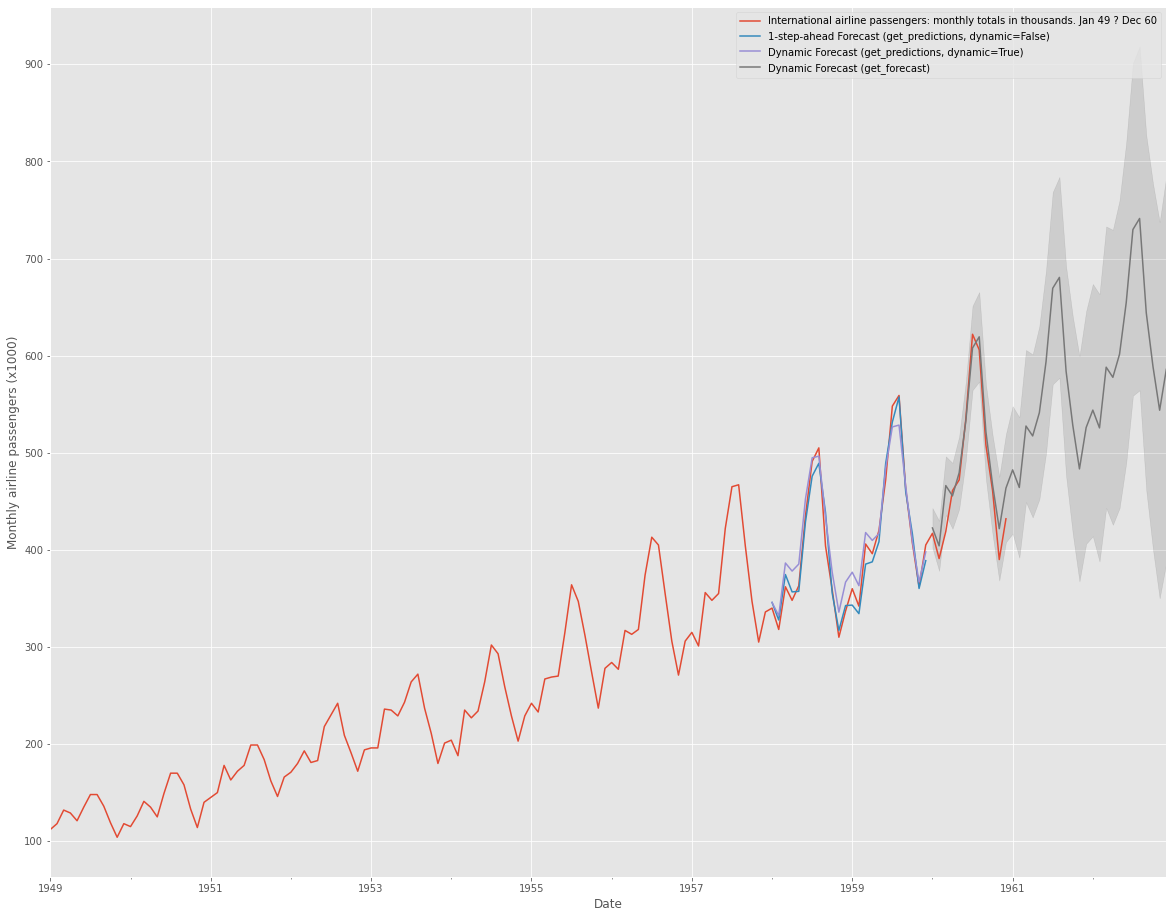

In [31]:
ax = data.plot(figsize=(20, 16))
pred0.predicted_mean.plot(ax=ax, label='1-step-ahead Forecast (get_predictions, dynamic=False)')
pred1.predicted_mean.plot(ax=ax, label='Dynamic Forecast (get_predictions, dynamic=True)')
pred2.predicted_mean.plot(ax=ax, label='Dynamic Forecast (get_forecast)')
ax.fill_between(pred2_ci.index, pred2_ci.iloc[:, 0], pred2_ci.iloc[:, 1], color='k', alpha=.1)
plt.ylabel('Monthly airline passengers (x1000)')
plt.xlabel('Date')
plt.legend()
plt.show()

Looking at the figure, the model seems to do a pretty good job at modeling the time series. The blue and purple lines are, as expected, very close to the red ground truth. What is more interesting is the gray line, the out of sample predinction. For such a simple time series, the ARIMA model is able to forecast the 1960 values accurately.

In order to quantify the accuracy of the prediction for 1960, we can compute metrics such as Mean Absolute Error, Mean Squared Error, or Root Mean Squared Error. These are all absolute metrics, are therefore scale-dependent. While they are useful, and widely used to compare different methods on a same dataset, here it would be more useful to express the error relatively to the magnitude of the time series we are trying to predict. One commonly-used percentage error measure is the Mean Absolute Percentage Error (MAPE). It has some drawbacks in special cases (notably, it can lead to division by zero) and improved measures have been proposed

In [32]:
prediction = pred2.predicted_mean['1960-01-01':'1960-12-01'].values
# flatten nested list
truth = list(itertools.chain.from_iterable(test_data.values))
# Mean Absolute Percentage Error
MAPE = np.mean(np.abs((truth - prediction) / truth)) * 100

print('The Mean Absolute Percentage Error for the forecast of year 1960 is {:.2f}%'.format(MAPE))

The Mean Absolute Percentage Error for the forecast of year 1960 is 3.58%
